In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
heart = pd.read_csv('heart_disease.csv')

In [3]:
print(heart.head())

    age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0  63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1  67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2  67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3  37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4  41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  


In [4]:
thalach = heart.thalach

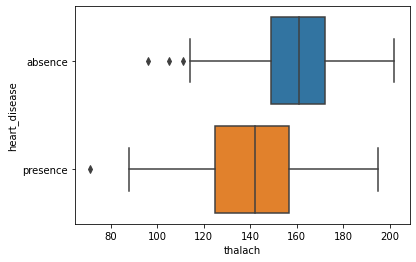

In [5]:
sns.boxplot(x=thalach, y=heart.heart_disease)
plt.show()

In [6]:
thalach_hd = thalach[heart.heart_disease == "presence"]
thalach_no_hd = thalach[heart.heart_disease == "absence"]

In [7]:
difference_mean_thalach = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print("thalach mean difference: {}"
.format(difference_mean_thalach))


difference_median_thalach = np.median(thalach_no_hd) - np.median(thalach_hd)
print("thalach median difference: {}"
.format(difference_median_thalach))

thalach mean difference: 19.11905597473242
thalach median difference: 19.0


In [8]:
from scipy.stats import ttest_ind

In [9]:
tstat_thalach, pval_thalach = ttest_ind(thalach_hd, thalach_no_hd)

print(pval_thalach)

if pval_thalach < 0.05:
  print("Since the pval is less than our significant threshold of 0.05, we reject the null hypothesis and conclude that there is a significant difference in thalach for people with heart disease compared to people without heart disease")
else:
  print("There is no significant difference")

3.456964908430172e-14
Since the pval is less than our significant threshold of 0.05, we reject the null hypothesis and conclude that there is a significant difference in thalach for people with heart disease compared to people without heart disease


resting blood pressure in mm Hg:

In [10]:
trestbps = heart.trestbps
trestbps_hd = trestbps[heart.heart_disease == "presence"]
trestbps_no_hd = trestbps[heart.heart_disease == "absence"]


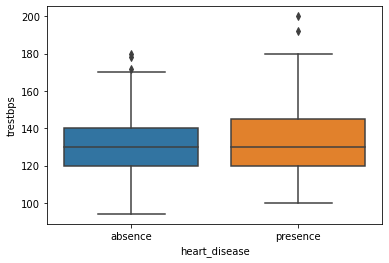

In [11]:
plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.trestbps)
plt.show()

In [12]:
difference_mean_trestbps = np.mean(trestbps_no_hd) - np.mean(trestbps_hd)
print("trestbps mean difference: {}"
.format(difference_mean_trestbps))


difference_median_trestbps = np.median(trestbps_no_hd) - np.median(trestbps_hd)
print("trestbps median difference: {}"
.format(difference_median_trestbps))

trestbps mean difference: -5.318345323740999
trestbps median difference: 0.0


In [13]:
tstat_trestbps, pval_trestbps = ttest_ind(trestbps_hd, trestbps_no_hd)
print(pval_trestbps)

if pval_trestbps < 0.05:
  print("Since the pval is less than our significant threshold of 0.05, we reject the null hypothesis and conclude that there is a significant difference in trestbps for people with heart disease compared to people without heart disease")
else:
  print("There is no significant difference")

0.008548268928594928
Since the pval is less than our significant threshold of 0.05, we reject the null hypothesis and conclude that there is a significant difference in trestbps for people with heart disease compared to people without heart disease


Chest Pain:

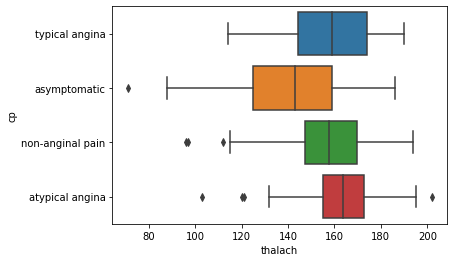

In [14]:
plt.clf()
sns.boxplot(x=thalach, y=heart.cp)
plt.show()


In [15]:
thalach_typical = thalach[heart.cp == "typical angina"]
thalach_aymptom = thalach[heart.cp == "asymptomatic"]
thalach_nonangin = thalach[heart.cp == "non-anginal pain"]
thalach_atypical = thalach[heart.cp == "atypical angina"]

a single hypothesis test to address the following null and alternative hypotheses:

Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.


Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.

In [16]:
from scipy.stats import f_oneway


In [18]:
Fstat, pval = f_oneway(thalach_typical, thalach_aymptom, thalach_nonangin, thalach_atypical)
print(pval)
if pval < 0.05:
    print("There is at least one at least one pair of chest pain categories for which people in those categories have significantly different thalach")
else:
    print("there are no pairs of chest pain categories for which people in those categories have significantly different thalach")

1.9065505247705008e-10
There is at least one at least one pair of chest pain categories for which people in those categories have significantly different thalach


determining which of those pairs are significantly different

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [20]:
results = pairwise_tukeyhsd(endog = heart.thalach, groups = heart.cp)
print(results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


for any pair with "True" we can conclude that people with those chest pain types have significantly different maximum heart rates during exercise

relationship between the kind of chest pain a person experiences and whether or not they have heart disease: 

In [21]:
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


In [23]:
from scipy.stats import chi2_contingency
chi2, pval, dof, exp = chi2_contingency(Xtab)
print('p-value for chi-square test: ', pval)
if pval < 0.05:
    print("There is a significant association between chest pain type and whether or not someone is diagnosed with heart disease")

p-value for chi-square test:  1.2517106007837527e-17
There is a significant association between chest pain type and whether or not someone is diagnosed with heart disease
